# Capstone Project - The Battle of the Neighborhoods
### Applied Data Science Capstone

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

Californian's by nature are fun loving people it does not matter what race, culture or region they belong to. They love to spend quality time with family and friends. Los Angeles(LA) is a densly populated metro city. To avoid the daily rat race, people live in the suburbs of LA and still called as Angelenos. Lots of people live in the suburbs of LA and most of the suburbs in outskirt of LA fall under the vicinity of the largest valley in the world called San Fernando Valley(SFV). This is where the city of west hills is located. 

### Problem

A well known Bowling chain is our audiences and stakeholders. The sponsors/stakeholders are looking forward to open up a new location for their bowling alley in the SFV's West Hills city. *The problem is where should they open their Bowling Alley in the city in order to get minimum competition, maximum customer turnout in short to find an optimal location?* This project specifically targets the stakeholders who are interested in opening a new location for **Bowling Alley** in the city of **West Hills of Clifornia** , USA. 

This report will answer the above question and prove with possibly a best solution to the problem. We will use our data science skills to wrangle the data and analyze some of the areas of given neighborhoods based on the above criteria. In order to support our findings we will present the stakeholders with the best or optimal location to facilitate their decision making.

**Some demographics on West Hills**: The population of the city is almost around 50,000 with mean household income of $120,608, which is way higher than the national household income.

## Data <a name="data"></a>

Based on definition of our problem, factors that will influence our decission are:
* number of existing Bowling Alleys in the neighborhood
* number of and distance to Bowling Alley in the neighborhood, if any
* distance of neighborhood from city center


For resolving above problem, we would need the below data which is acquired from Redfin. Different datasets have been combined into one data file. Also, we acquired some demographics about the city of West Hills from Niche.

Data acquired through downloading csv files and some scraped data have been combined into a single dataset as a .CSV file. There were some missing values and some parts of the data were coded wrong, so we cleaned the data to suit our purpose.

We dropped some features from the data and kept some as they were more relevant for our solution. Features like Address, City, Zip Code, Location, Latitude and Longitude were kept and features like Beds, Baths, Lot size and so on were dropped. We also dropped some data rows as they were wrongly coded for the city’s zip code.

Following data sources will be needed to extract/generate the required information:
* candidate areas data is obtained using **Redfin**
* number of Bowling Alleys and the venue type and location in every neighborhood will be obtained using **Foursquare API**
* coordinate of West Hills center will be obtained using **Nomatim from geopy geocoders** 


In [1]:
# Imports and Installs

import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

# !conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # For geocoding data

# !conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

# import k-means from clustering stage
from sklearn.cluster import KMeans

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

print("Libraries imported.")

Libraries imported.


In [2]:
# Get selected features into the dataframe from .CSV file.
df = pd.read_csv('westhills_data.csv', usecols =['ADDRESS', 'CITY','STATE OR PROVINCE','ZIP OR POSTAL CODE', 'LATITUDE','LONGITUDE'])

# Rename features/Columns
df.rename(columns={'ADDRESS':'Neighborhood', 'CITY':'City',"STATE OR PROVINCE": "State",'ZIP OR POSTAL CODE':'ZipCode', 'LATITUDE':'Latitude','LONGITUDE':'Longitude'}, inplace=True)

# Remove features that are not required
df = df.drop(['City', 'State'], axis=1)

# Remove unit number for same address and same latitude and longitude 
df['Neighborhood'] = df['Neighborhood'].map(lambda x: x.split(' #')[0].strip())

# Remove street number
df['Neighborhood'] = df['Neighborhood'].str.replace('\d+', '')

# Remove dulicate rows
df.drop_duplicates(subset=['Neighborhood'], inplace=True, ignore_index=True)

df.head(50)

,Neighborhood,ZipCode,Latitude,Longitude
0,Cowper Ave,91304,34.214568,-118.647376
1,Asman Ave,91307,34.203795,-118.616474
2,Rudnick Ave,91304,34.226878,-118.613329
3,Community St,91304,34.221487,-118.640221
4,Mencken Ave,91304,34.214276,-118.649154
5,Hamlin St,91307,34.188693,-118.622719
6,Capistrano Ave,91307,34.190720,-118.616930
7,Gross Ave,91307,34.189128,-118.640175
8,gross Ave,91307,34.189588,-118.640722
9,Hartland St,91307,34.194387,-118.617249


In [3]:
#Let's check the size of the resulting dataframe
df.shape

(191, 4)

In [4]:
address = 'West Hills, CA'

geolocator = Nominatim(user_agent="wh_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of West Hills City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of West Hills City are 34.2032325, -118.645476.


In [5]:
# create map of West Hills using latitude and longitude values
map_wh = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers to map
for lat, lng, neighborhood, zipcode  in zip(df['Latitude'], df['Longitude'], df['Neighborhood'], df['ZipCode']):
    label = '{}, {}'.format(neighborhood, zipcode)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_wh)  
    
map_wh

In [7]:
CLIENT_ID = 'BJHEUKFCAEZ2MSUBKCDLPD5UVBI4WYJLYCALBS2UOV4VKZBD' # your Foursquare ID
CLIENT_SECRET = 'LA4PHK5TUHZN2MAOX1L44LY2IXZFVVD43OPEEJJ5XFLJC41Z' # your Foursquare Secret
# ACCESS_TOKEN = 'L13DBF5I1XI4UE3FKQYA13UGCK3H2UWIFN33ICEZKB5WJZNA' # your FourSquare Access Token
# ---------------------------------------------------------------------------------------------------------
# # ekta
# CLIENT_ID = 'QEF4SFROUUVOQKNPAFNNRDUW4ACAWSYYG312LM3BKEDDKPIZ' # your Foursquare ID
# CLIENT_SECRET = 'CCBFW1WDVTUYDLPFX3SR0QBB5R2UKRYOZ3F1JDJ3PLQMPDRM' # your Foursquare Secret


# # donscara
# CLIENT_ID = 'JBREGZ4UNA53HX43WMAD4TQ2X2XJWMX5DPHEZEIZHQA0ACNP' # your Foursquare ID
# CLIENT_SECRET = 'VNS40KF3V4MGSWWAV0IGQINZIGIT1EQKNCWBFPOS3QF1JMOJ' # your Foursquare Secret
VERSION =  '20210720' #'20180605'  Foursquare API version
LIMIT = 100 # A default Foursquare API limit value
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

# import requests

# def get_coordinates(api_key, address, verbose=False):
#     try:
#         url = 'https://maps.googleapis.com/maps/api/geocode/json?key={}&address={}'.format(api_key, address)
#         response = requests.get(url).json()
#         if verbose:
#             print('Google Maps API JSON result =>', response)
#         results = response['results']
#         geographical_data = results[0]['geometry']['location'] # get geographical coordinates
#         lat = geographical_data['lat']
#         lon = geographical_data['lng']
#         return [lat, lon]
#     except:
#         return [None, None]
    
# address = 'Alexanderplatz, Berlin, Germany'
# berlin_center = get_coordinates(google_api_key, address)
# print('Coordinate of {}: {}'.format(address, berlin_center))

Your credentails:
CLIENT_ID: BJHEUKFCAEZ2MSUBKCDLPD5UVBI4WYJLYCALBS2UOV4VKZBD
CLIENT_SECRET:LA4PHK5TUHZN2MAOX1L44LY2IXZFVVD43OPEEJJ5XFLJC41Z


In [8]:
df.loc[0, 'Neighborhood']

' Cowper Ave'

In [9]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
#         print( requests.get(url).json())
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [10]:
westhills_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

 Cowper Ave
 Asman Ave
 Rudnick Ave
 Community St
 Mencken Ave
 Hamlin St
 Capistrano Ave
 Gross Ave
 gross Ave
 Hartland St
 Vicky Ave
 Vanowen St
 Bobbyboyar Ave
 Atheling Way
 Gateshead Way
 Nita Ave
 Castle Peak Dr
 ROCKY MESA Pl
 Covello St
 Sherman Way
 Hillhurst Dr
 Shoup Ave
 Valley Flores Dr
 Marquand Ave
 Arminta St
 Strathern St
 Cohasset St
 Runnymede St
 Valerio St
 Fallbrook Ave
 Wyandotte St
  Wyandotte St
 Leadwell St
 Sale Ave
 Sausalito Ave
 Kentland Ave
 Ponce Ave
 Enadia Way
 Marlin Pl
 Vose St
 Schoolcraft St
 Bassett St
 Atron Ave
 West Vail Dr
 Sandalwood St
 Pondera Cir
 Gerrad Way
 Darnoch Way
 Kensington Ct
 Liz Ct
 Dorie Dr
 Linley Ln
 Posey Ln
 Sedgewick Ct
 Ashton Ct
 Westcliff Dr
 Rutherford Hill Dr
 Cliffside Ct
 Knollwood Ct
 Glenhaven Ct
 Lance Pl
 Scarborough Peak Dr
 Balmoral Ln
 Kilty Ave
 Highlander Rd
 Green Vista Cir
 Rockridge
 Salisbury Rd
 Deveron Ridge Rd
 Middlesbury Ridge Cir
 Valley Cir
 Canyonwood Dr
 Crabapple Ct
 Indian Hill Ln
 Vickivie

#### Let's check the size of the resulting dataframe

In [11]:
print(westhills_venues.shape)
westhills_venues.head()

(1187, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Cowper Ave,34.214568,-118.647376,Lazy J Park,34.212002,-118.644622,Park
1,Cowper Ave,34.214568,-118.647376,"Locksmithology, Inc.",34.210327,-118.645627,Locksmith
2,Asman Ave,34.203795,-118.616474,Go's Mart,34.200696,-118.613450,Sushi Restaurant
3,Asman Ave,34.203795,-118.616474,Ginger Thai,34.200518,-118.613958,Thai Restaurant
4,Asman Ave,34.203795,-118.616474,Sze-chwan Inn,34.202187,-118.613009,Chinese Restaurant


#### Let's check how many venues were returned for each neighborhood

In [12]:
westhills_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Wyandotte St,6,6,6,6,6,6
Angela Ave,4,4,4,4,4,4
Archwood St,30,30,30,30,30,30
Arminta St,3,3,3,3,3,3
Ashton Ct,3,3,3,3,3,3
...,...,...,...,...,...,...
gross Ave,41,41,41,41,41,41
Lucca,7,7,7,7,7,7
Marsala,7,7,7,7,7,7


#### let's plot the number of venues by each neighborhood.

In [13]:
# use the inline backend to generate the plots within the browser.
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')  # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.3.2


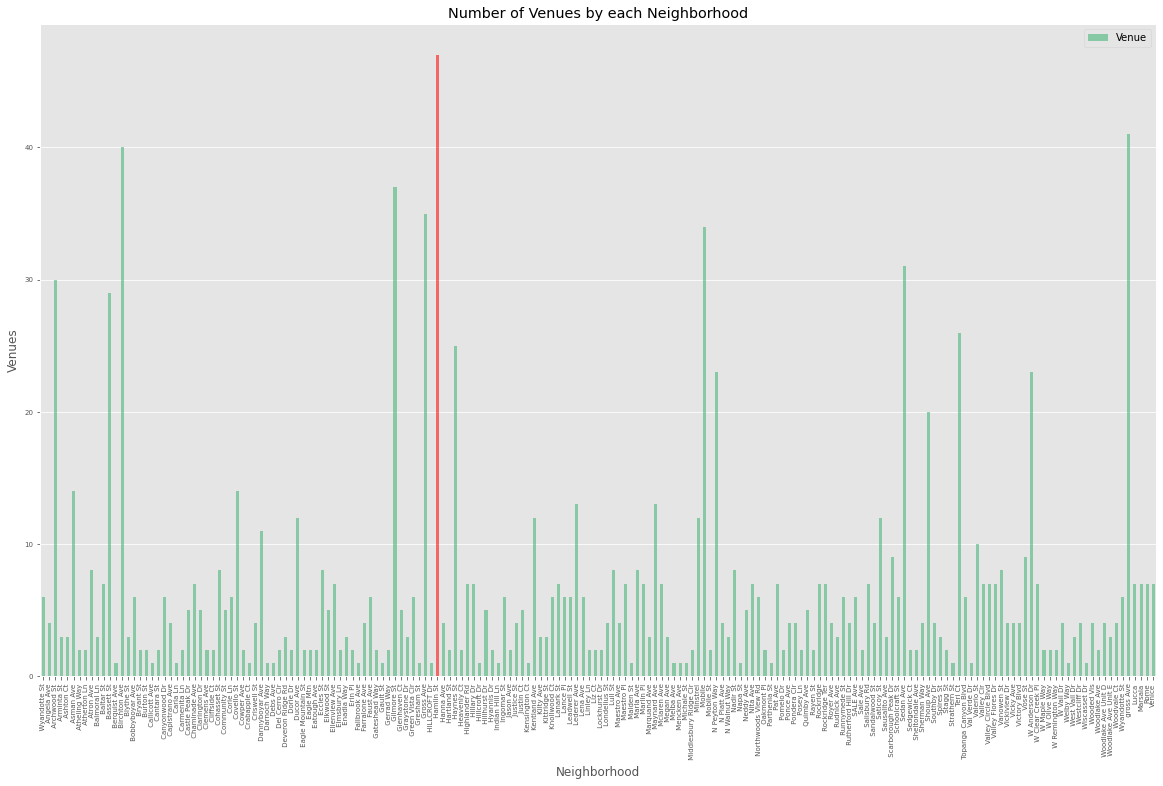

In [14]:
# let's plot the number of venues by each neighborhood.

# Get data ready for plotting
df_nh = westhills_venues.groupby('Neighborhood').count()
df_nh = df_nh.drop(['Neighborhood Latitude', 'Neighborhood Longitude', 'Venue Latitude','Venue Longitude','Venue Category'], axis=1)

# Conditionally changing color for highest bar.
custom_color = ['grey' if (x < max(df_nh['Venue'])) else 'red' for x in df_nh['Venue']]
custom_color = df_nh['Venue'].map(lambda x: ['mediumseagreen' if (x < max(df_nh['Venue'])) else 'red' for x in df_nh['Venue']])

# plot data
df_nh.plot(kind='bar', 
           figsize=(20, 12), 
           alpha=0.55,
           color= custom_color,
           fontsize=7
          )


plt.xlabel('Neighborhood') # add to x-label to the plot
plt.ylabel('Venues') # add y-label to the plot
plt.title('Number of Venues by each Neighborhood') # add title to the plot
plt.grid(axis='x')

plt.show()

In [15]:
print('There are {} uniques categories.'.format(len(westhills_venues['Venue Category'].unique())))

There are 122 uniques categories.


#### Let's analyze each neighborhood

In [18]:
# one hot encoding
westhills_onehot = pd.get_dummies(westhills_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
westhills_onehot['Neighborhood'] = westhills_venues['Neighborhood'] 
fixed_columns = [westhills_onehot.columns[-1]] + list(westhills_onehot.columns[:-1])
westhills_onehot = westhills_onehot[fixed_columns]

# move neighborhood column to the first column
col = westhills_onehot.pop('Neighborhood')
westhills_onehot.insert(0, 'Neighborhood', col)

westhills_onehot.head()

,Neighborhood,ATM,American Restaurant,Arcade,Arts & Crafts Store,Astrologer,BBQ Joint,Baby Store,Bagel Shop,Bakery,...,Thai Restaurant,Theater,Tourist Information Center,Trail,Video Game Store,Video Store,Vietnamese Restaurant,Weight Loss Center,Wings Joint,Yoga Studio
0,Cowper Ave,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Cowper Ave,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Asman Ave,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Asman Ave,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,Asman Ave,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Again, let's examine the new dataframe size.

In [19]:
westhills_onehot.shape

(1187, 123)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [20]:
westhills_grouped = westhills_onehot.groupby('Neighborhood').mean().reset_index()
westhills_grouped

,Neighborhood,ATM,American Restaurant,Arcade,Arts & Crafts Store,Astrologer,BBQ Joint,Baby Store,Bagel Shop,Bakery,...,Thai Restaurant,Theater,Tourist Information Center,Trail,Video Game Store,Video Store,Vietnamese Restaurant,Weight Loss Center,Wings Joint,Yoga Studio
0,Wyandotte St,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
1,Angela Ave,0.000000,0.0,0.0,0.0,0.25,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
2,Archwood St,0.033333,0.0,0.0,0.0,0.00,0.0,0.0,0.033333,0.033333,...,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.033333,0.0,0.0
3,Arminta St,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
4,Ashton Ct,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,gross Ave,0.024390,0.0,0.0,0.0,0.00,0.0,0.0,0.024390,0.024390,...,0.0,0.0,0.0,0.0,0.024390,0.0,0.0,0.024390,0.0,0.0
180,Lucca,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
181,Marsala,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
182,Rome,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0


#### Let's confirm the new size, again.

In [21]:
westhills_grouped.shape

(184, 123)

#### Let's print each neighborhood along with the top 5 most common venues

In [22]:
num_top_venues = 5

for hood in westhills_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = westhills_grouped[westhills_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----  Wyandotte St----
            venue  freq
0    Home Service  0.33
1        Pharmacy  0.33
2            Pool  0.17
3  Sandwich Place  0.17
4   Moving Target  0.00


---- Angela Ave----
          venue  freq
0    Astrologer  0.25
1  Home Service  0.25
2          Park  0.25
3          Food  0.25
4           ATM  0.00


---- Archwood St----
                venue  freq
0  Salon / Barbershop  0.07
1  Mexican Restaurant  0.07
2  Chinese Restaurant  0.07
3   Food & Drink Shop  0.07
4      Ice Cream Shop  0.07


---- Arminta St----
           venue  freq
0   Home Service  0.33
1      Locksmith  0.33
2           Park  0.33
3            ATM  0.00
4  Moving Target  0.00


---- Ashton Ct----
           venue  freq
0   Home Service  0.33
1      Locksmith  0.33
2           Park  0.33
3            ATM  0.00
4  Moving Target  0.00


---- Asman Ave----
               venue  freq
0        Pizza Place  0.14
1  Indian Restaurant  0.07
2        Supermarket  0.07
3   Sushi Restaurant  0.07
4  Convenienc

4             ATM  0.00


---- Faust Ave----
               venue  freq
0              Diner  0.17
1   Halal Restaurant  0.17
2       Liquor Store  0.17
3  Indian Restaurant  0.17
4               Park  0.17


---- Gateshead Way----
           venue  freq
0  Garden Center   0.5
1   Home Service   0.5
2  Movie Theater   0.0
3     Playground   0.0
4    Pizza Place   0.0


---- Gault St----
                   venue  freq
0  Outdoors & Recreation   1.0
1                    ATM   0.0
2      Recreation Center   0.0
3             Playground   0.0
4            Pizza Place   0.0


---- Gerrad Way----
           venue  freq
0     Astrologer   0.5
1           Food   0.5
2            ATM   0.0
3  Moving Target   0.0
4     Playground   0.0


---- Gilmore St----
                  venue  freq
0  Fast Food Restaurant  0.11
1           Pizza Place  0.05
2        Ice Cream Shop  0.05
3           Coffee Shop  0.05
4    Mexican Restaurant  0.05


---- Glenhaven Ct----
                        venue  freq
0 

4                  Playground   0.0


---- Minstrel----
                 venue  freq
0          Pizza Place  0.25
1                  Spa  0.08
2           Restaurant  0.08
3         Dance Studio  0.08
4  Martial Arts School  0.08


---- Mobile----
                  venue  freq
0  Fast Food Restaurant  0.09
1           Pizza Place  0.06
2    Mexican Restaurant  0.06
3           Coffee Shop  0.06
4                  Bank  0.06


---- Mobile St----
            venue  freq
0   Moving Target   0.5
1  Ice Cream Shop   0.5
2             ATM   0.0
3      Playground   0.0
4     Pizza Place   0.0


---- N Peyton Way----
                  venue  freq
0     Indian Restaurant  0.13
1    Chinese Restaurant  0.09
2  Fast Food Restaurant  0.09
3                   ATM  0.04
4     Korean Restaurant  0.04


---- N Platt Ave----
                        venue  freq
0                   Juice Bar  0.25
1  Tourist Information Center  0.25
2                        Park  0.25
3                        Food  0.25


           venue  freq
0  Tattoo Parlor   1.0
1            ATM   0.0
2  Movie Theater   0.0
3     Playground   0.0
4    Pizza Place   0.0


---- West Vail Dr----
            venue  freq
0  Sandwich Place  0.33
1      Astrologer  0.33
2     Beer Garden  0.33
3             ATM  0.00
4            Park  0.00


---- Westcliff Dr----
                venue  freq
0                Park  0.50
1  Italian Restaurant  0.25
2    Business Service  0.25
3                 ATM  0.00
4       Moving Target  0.00


---- Wiscasset Dr----
              venue  freq
0  Business Service   1.0
1               ATM   0.0
2       Music Store   0.0
3              Pool   0.0
4        Playground   0.0


---- Wooded Vis----
           venue  freq
0  Moving Target  0.25
1      BBQ Joint  0.25
2          Trail  0.25
3           Park  0.25
4            ATM  0.00


---- Woodlake Ave----
                   venue  freq
0  Korean BBQ Restaurant   0.5
1         Hardware Store   0.5
2                    ATM   0.0
3          Mov

In [23]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [24]:
num_top_venues = 10

indicators = ['st', 'dr', 'ct', 'pl' 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = westhills_grouped['Neighborhood']


for ind in np.arange(westhills_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(westhills_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2dr Most Common Venue,3ct Most Common Venue,4plrd Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Wyandotte St,Home Service,Pharmacy,Pool,Sandwich Place,Food,Department Store,Diner,Discount Store,Dive Bar,Donut Shop
1,Angela Ave,Home Service,Astrologer,Park,Food,Yoga Studio,Food & Drink Shop,Diner,Discount Store,Dive Bar,Donut Shop
2,Archwood St,Salon / Barbershop,Chinese Restaurant,Mexican Restaurant,Ice Cream Shop,Food & Drink Shop,Italian Restaurant,Fast Food Restaurant,Pizza Place,Miscellaneous Shop,Grocery Store
3,Arminta St,Home Service,Park,Locksmith,Yoga Studio,Food & Drink Shop,Diner,Discount Store,Dive Bar,Donut Shop,Dry Cleaner
4,Ashton Ct,Home Service,Park,Locksmith,Yoga Studio,Food & Drink Shop,Diner,Discount Store,Dive Bar,Donut Shop,Dry Cleaner


In [25]:
# set number of clusters
kclusters = 5

westhills_grouped_clustering = westhills_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(westhills_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 0, 1, 0, 0, 1, 1, 2, 1, 1])

In [26]:
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2dr Most Common Venue,3ct Most Common Venue,4plrd Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Wyandotte St,Home Service,Pharmacy,Pool,Sandwich Place,Food,Department Store,Diner,Discount Store,Dive Bar,Donut Shop
1,Angela Ave,Home Service,Astrologer,Park,Food,Yoga Studio,Food & Drink Shop,Diner,Discount Store,Dive Bar,Donut Shop
2,Archwood St,Salon / Barbershop,Chinese Restaurant,Mexican Restaurant,Ice Cream Shop,Food & Drink Shop,Italian Restaurant,Fast Food Restaurant,Pizza Place,Miscellaneous Shop,Grocery Store
3,Arminta St,Home Service,Park,Locksmith,Yoga Studio,Food & Drink Shop,Diner,Discount Store,Dive Bar,Donut Shop,Dry Cleaner
4,Ashton Ct,Home Service,Park,Locksmith,Yoga Studio,Food & Drink Shop,Diner,Discount Store,Dive Bar,Donut Shop,Dry Cleaner


#### Cluster Neighborhoods

In [27]:
# set number of clusters
kclusters = 5

westhills_grouped_clustering = westhills_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(westhills_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 0, 1, 0, 0, 1, 1, 2, 1, 1])

In [32]:
# Add clustering labels
# neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

westhills_merged = df

# Merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
westhills_merged = westhills_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

# # Delete rows that show NaN in Cluster Labels 
westhills_merged.dropna(subset = ["Cluster Labels"], inplace=True)

# Convert Cluster Labels to type float to integer, if any. 
westhills_merged['Cluster Labels'] = westhills_merged['Cluster Labels'].astype(int)

westhills_merged.head()


,Neighborhood,ZipCode,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2dr Most Common Venue,3ct Most Common Venue,4plrd Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Cowper Ave,91304,34.214568,-118.647376,0,Park,Locksmith,Yoga Studio,Food Truck,Diner,Discount Store,Dive Bar,Donut Shop,Dry Cleaner,Electronics Store
1,Asman Ave,91307,34.203795,-118.616474,1,Pizza Place,Convenience Store,Thai Restaurant,Snack Place,Deli / Bodega,Supermarket,Sushi Restaurant,Chinese Restaurant,Bank,Fast Food Restaurant
2,Rudnick Ave,91304,34.226878,-118.613329,1,Nightlife Spot,Campground,Music Venue,Yoga Studio,Food & Drink Shop,Discount Store,Dive Bar,Donut Shop,Dry Cleaner,Electronics Store
3,Community St,91304,34.221487,-118.640221,1,Italian Restaurant,Liquor Store,Cosmetics Shop,Scenic Lookout,Food Truck,Health & Beauty Service,Flower Shop,Diner,Indian Restaurant,Discount Store
4,Mencken Ave,91304,34.214276,-118.649154,3,Park,Yoga Studio,Deli / Bodega,Diner,Discount Store,Dive Bar,Donut Shop,Dry Cleaner,Electronics Store,Event Service


In [33]:
cluster_labels = westhills_merged.pop('Cluster Labels')
westhills_merged.insert(0, 'Cluster Labels', cluster_labels)
westhills_merged.head(50)

,Cluster Labels,Neighborhood,ZipCode,Latitude,Longitude,1st Most Common Venue,2dr Most Common Venue,3ct Most Common Venue,4plrd Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Cowper Ave,91304,34.214568,-118.647376,Park,Locksmith,Yoga Studio,Food Truck,Diner,Discount Store,Dive Bar,Donut Shop,Dry Cleaner,Electronics Store
1,1,Asman Ave,91307,34.203795,-118.616474,Pizza Place,Convenience Store,Thai Restaurant,Snack Place,Deli / Bodega,Supermarket,Sushi Restaurant,Chinese Restaurant,Bank,Fast Food Restaurant
2,1,Rudnick Ave,91304,34.226878,-118.613329,Nightlife Spot,Campground,Music Venue,Yoga Studio,Food & Drink Shop,Discount Store,Dive Bar,Donut Shop,Dry Cleaner,Electronics Store
3,1,Community St,91304,34.221487,-118.640221,Italian Restaurant,Liquor Store,Cosmetics Shop,Scenic Lookout,Food Truck,Health & Beauty Service,Flower Shop,Diner,Indian Restaurant,Discount Store
4,3,Mencken Ave,91304,34.214276,-118.649154,Park,Yoga Studio,Deli / Bodega,Diner,Discount Store,Dive Bar,Donut Shop,Dry Cleaner,Electronics Store,Event Service
5,1,Hamlin St,91307,34.188693,-118.622719,Fast Food Restaurant,Coffee Shop,Furniture / Home Store,Cosmetics Shop,Pharmacy,Big Box Store,Department Store,Clothing Store,Juice Bar,Insurance Office
6,0,Capistrano Ave,91307,34.190720,-118.616930,Park,Recreation Center,Japanese Restaurant,Massage Studio,Electronics Store,Flower Shop,Fast Food Restaurant,Fabric Shop,Event Service,Yoga Studio
7,1,Gross Ave,91307,34.189128,-118.640175,Fast Food Restaurant,Pizza Place,Bank,Chinese Restaurant,Coffee Shop,Mexican Restaurant,Ice Cream Shop,Dry Cleaner,Gas Station,Salon / Barbershop
8,1,gross Ave,91307,34.189588,-118.640722,Pizza Place,Mexican Restaurant,Fast Food Restaurant,Dry Cleaner,Food & Drink Shop,Salon / Barbershop,Bank,Chinese Restaurant,Coffee Shop,Ice Cream Shop
9,0,Hartland St,91307,34.194387,-118.617249,Recreation Center,Park,Food & Drink Shop,Department Store,Diner,Discount Store,Dive Bar,Donut Shop,Dry Cleaner,Electronics Store


#### Let's Create the map for all 5 clusters using Folium!

In [34]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(westhills_merged['Latitude'], westhills_merged['Longitude'], westhills_merged['Neighborhood'], westhills_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-2],
        fill=True,
        fill_color=rainbow[cluster-2],
        fill_opacity=0.9).add_to(map_clusters)
       
map_clusters

## Methodology <a name="methodology"></a>

In this project we are aiming to find the most happening places or neighborhoods in the city of west hills with minimum competitors in the bowling business, so that we can suggest the optimal location to open a new location of our Client (Which is a well-known bowling alley company).  

In this project we will direct our efforts on detecting areas of West Hills that have high density of business with Bowling Alleys, if any. 

In first step we have collected the required **data: location and type/category of every venue business in West Hills** (A Los Angeles Suburb). We have also **Clusterd the venues** with the help of Foursquare categorization and with Folium visualization techniques we have also plotted the arears of different clusters. 

We explored the different areas of West Hills to find out top 5 most common venues and explore'**venue density**'. We have also eplored the top 10 mosted visited venues in each neighborhood.  

Now finally we will analyze the each cluster, we will be focusing on the basic requirement that is area with most venues and least bowling alleys.    

We will present map of all such locations but also create clusters (using **k-means clustering**) of those locations to identify neighborhoods / addresses which should be a starting point for final 'street level' exploration and search for optimal venue location by stakeholders.

## Analysis <a name="analysis"></a>

Let's examin our clusters for venue categories in different neighborhoods.  

#### Examin Clusters : Total number of Categories in each Neighborhood by type.

In [40]:
# westhills_merged.head()
all_cluster = pd.merge(westhills_onehot.groupby('Neighborhood').sum(),westhills_merged[['Neighborhood','Cluster Labels']],left_on='Neighborhood', right_on='Neighborhood',how='inner')
all_cluster = all_cluster.iloc[:,1:].groupby('Cluster Labels').sum().transpose()
all_cluster.head(50)


Cluster Labels,0,1,2,3,4
ATM,0,12,0,0,0
American Restaurant,0,11,0,0,0
Arcade,0,5,0,0,0
Arts & Crafts Store,0,2,0,0,0
Astrologer,2,6,0,0,0
BBQ Joint,1,0,0,0,0
Baby Store,0,2,0,0,0
Bagel Shop,0,10,0,0,0
Bakery,0,10,0,0,0
Bank,0,19,0,0,0


In [45]:
import seaborn as sns

def cluster_bar_chart(cluster_idx):
    # Set style for the chart
    sns.set(style="darkgrid",rc={'figure.figsize':(20,10)})
    
    # Delete all zeros values in the cluster column index 
    df_clusters = all_cluster[[cluster_idx]].drop(all_cluster[[cluster_idx]][all_cluster[cluster_idx]==0].index)
    df_clusters.sort_values([cluster_idx], ascending=False, inplace=True)

    chart = sns.barplot(x=df_clusters.index, y=cluster_idx, data=df_clusters)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    chart.set_title('West Hills - Venue Categories for Cluster {}'.format(cluster_idx), fontsize = 20)
    chart.grid(False)


#### Plot bar char for identifying most venue types for each cluster.

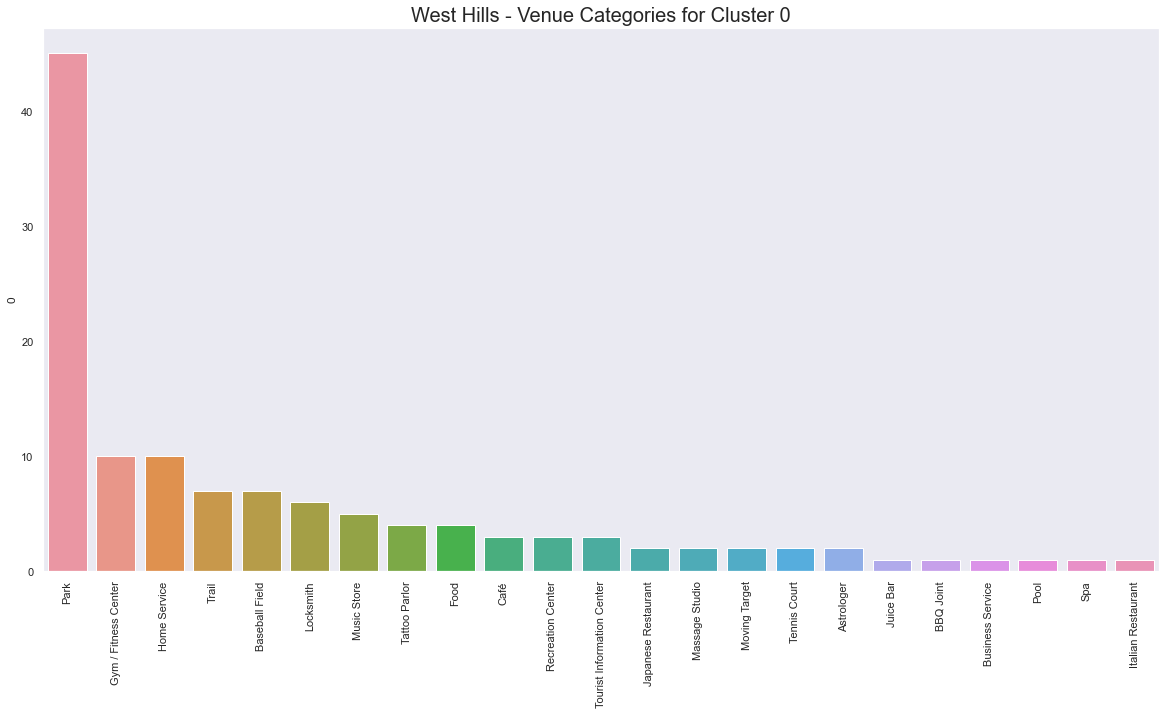

In [46]:
cluster_bar_chart(0)

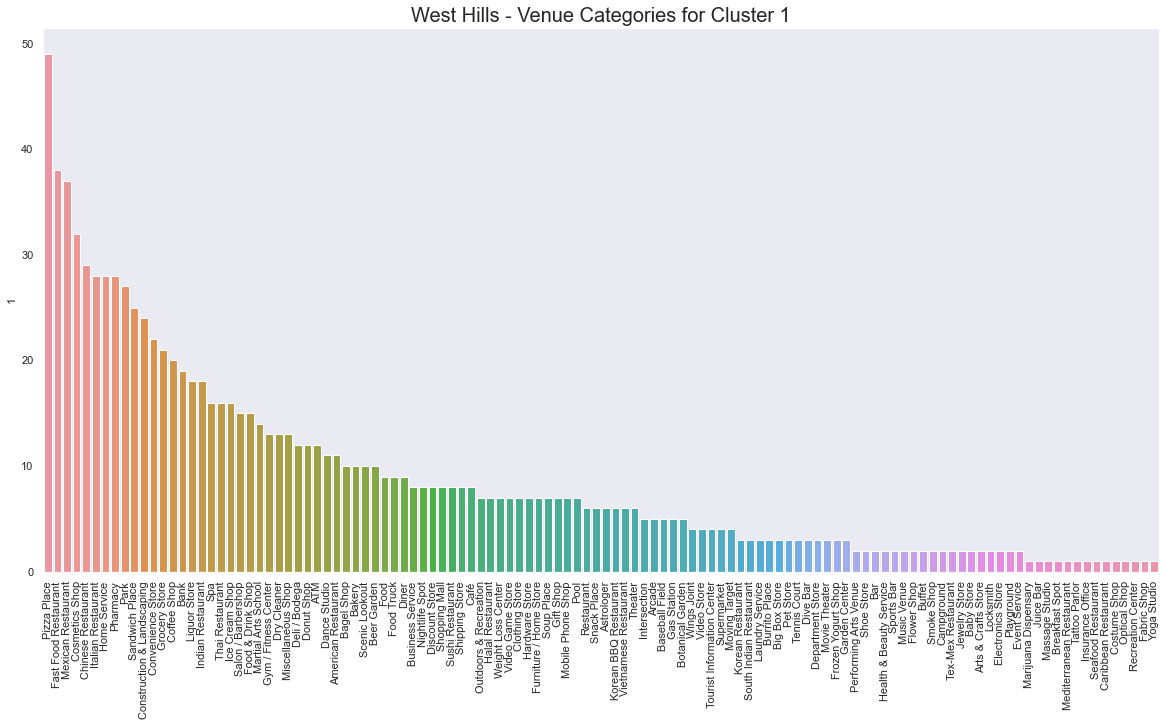

In [47]:
cluster_bar_chart(1)

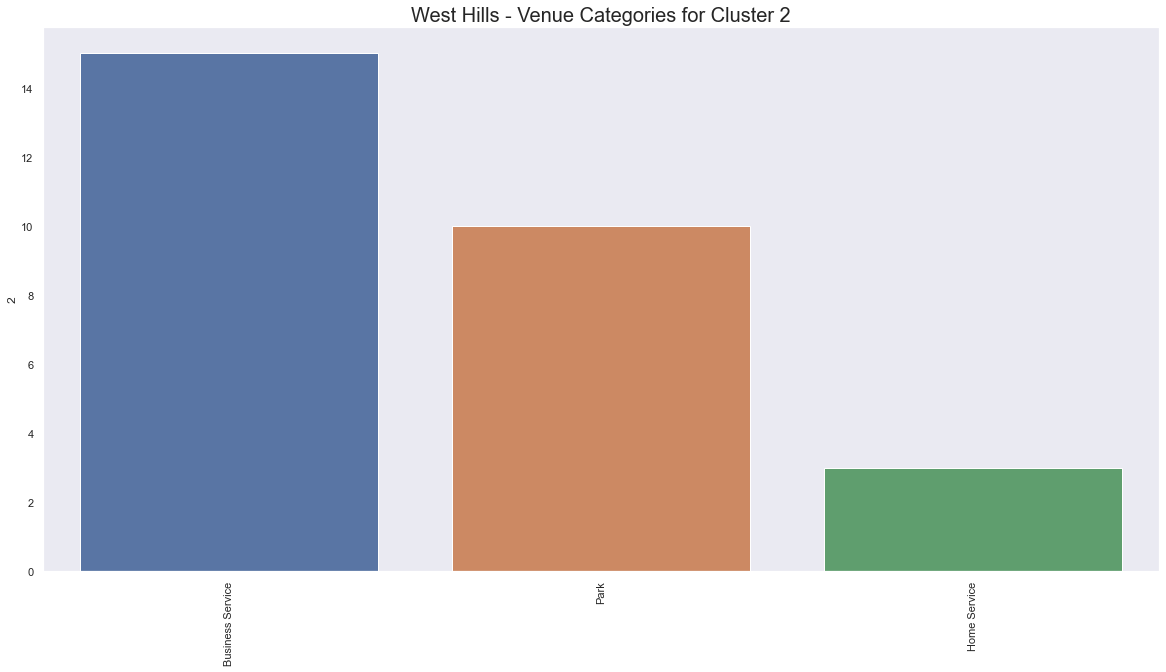

In [48]:
cluster_bar_chart(2)

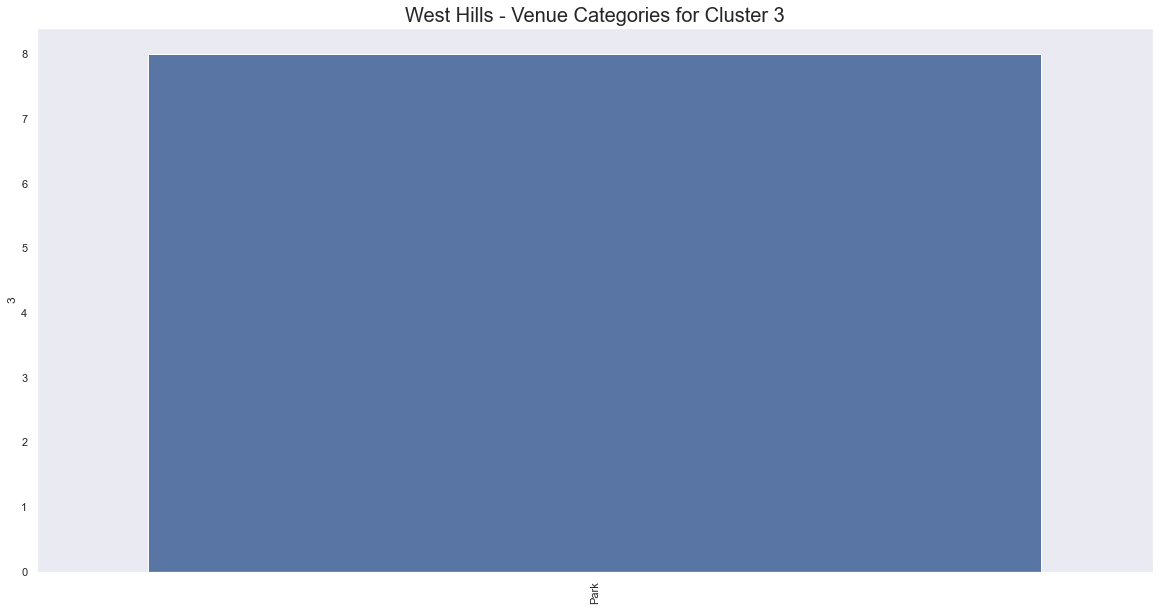

In [49]:
cluster_bar_chart(3)

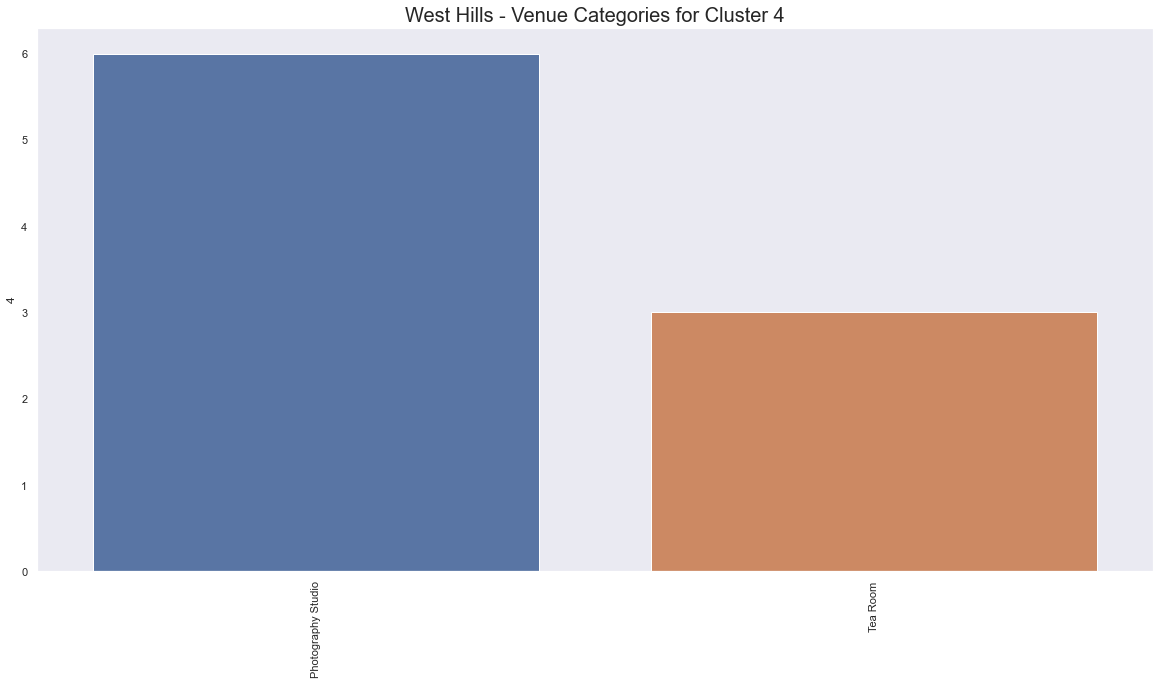

In [50]:
cluster_bar_chart(4)

### Cluster 1

In [51]:
westhills_merged.loc[westhills_merged['Cluster Labels'] == 0, westhills_merged.columns[[1] + list(range(5, westhills_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2dr Most Common Venue,3ct Most Common Venue,4plrd Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Cowper Ave,Park,Locksmith,Yoga Studio,Food Truck,Diner,Discount Store,Dive Bar,Donut Shop,Dry Cleaner,Electronics Store
6,Capistrano Ave,Park,Recreation Center,Japanese Restaurant,Massage Studio,Electronics Store,Flower Shop,Fast Food Restaurant,Fabric Shop,Event Service,Yoga Studio
9,Hartland St,Recreation Center,Park,Food & Drink Shop,Department Store,Diner,Discount Store,Dive Bar,Donut Shop,Dry Cleaner,Electronics Store
16,Castle Peak Dr,Park,Home Service,Baseball Field,Trail,Electronics Store,Flower Shop,Fast Food Restaurant,Fabric Shop,Event Service,Yoga Studio
23,Marquand Ave,Home Service,Park,Locksmith,Yoga Studio,Food & Drink Shop,Diner,Discount Store,Dive Bar,Donut Shop,Dry Cleaner
24,Arminta St,Home Service,Park,Locksmith,Yoga Studio,Food & Drink Shop,Diner,Discount Store,Dive Bar,Donut Shop,Dry Cleaner
44,Sandalwood St,Food,Astrologer,Park,Yoga Studio,Food Truck,Diner,Discount Store,Dive Bar,Donut Shop,Dry Cleaner
49,Liz Ct,Park,Gym / Fitness Center,Yoga Studio,Food & Drink Shop,Diner,Discount Store,Dive Bar,Donut Shop,Dry Cleaner,Electronics Store
50,Dorie Dr,Park,Gym / Fitness Center,Yoga Studio,Food & Drink Shop,Diner,Discount Store,Dive Bar,Donut Shop,Dry Cleaner,Electronics Store
51,Linley Ln,Park,Gym / Fitness Center,Yoga Studio,Food & Drink Shop,Diner,Discount Store,Dive Bar,Donut Shop,Dry Cleaner,Electronics Store


### Cluster 2

In [52]:
westhills_merged.loc[westhills_merged['Cluster Labels'] == 1, westhills_merged.columns[[1] + list(range(5, westhills_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2dr Most Common Venue,3ct Most Common Venue,4plrd Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Asman Ave,Pizza Place,Convenience Store,Thai Restaurant,Snack Place,Deli / Bodega,Supermarket,Sushi Restaurant,Chinese Restaurant,Bank,Fast Food Restaurant
2,Rudnick Ave,Nightlife Spot,Campground,Music Venue,Yoga Studio,Food & Drink Shop,Discount Store,Dive Bar,Donut Shop,Dry Cleaner,Electronics Store
3,Community St,Italian Restaurant,Liquor Store,Cosmetics Shop,Scenic Lookout,Food Truck,Health & Beauty Service,Flower Shop,Diner,Indian Restaurant,Discount Store
5,Hamlin St,Fast Food Restaurant,Coffee Shop,Furniture / Home Store,Cosmetics Shop,Pharmacy,Big Box Store,Department Store,Clothing Store,Juice Bar,Insurance Office
7,Gross Ave,Fast Food Restaurant,Pizza Place,Bank,Chinese Restaurant,Coffee Shop,Mexican Restaurant,Ice Cream Shop,Dry Cleaner,Gas Station,Salon / Barbershop
...,...,...,...,...,...,...,...,...,...,...,...
184,Chaminade Ave,Food,Park,Martial Arts School,Grocery Store,Italian Restaurant,Theater,Donut Shop,Dive Bar,Dry Cleaner,Food & Drink Shop
185,Burton St,Botanical Garden,Food Truck,Frozen Yogurt Shop,Diner,Discount Store,Dive Bar,Donut Shop,Dry Cleaner,Electronics Store,Event Service
188,W Clear Creek Pl,Italian Restaurant,Deli / Bodega,Cosmetics Shop,Miscellaneous Shop,Scenic Lookout,Gym / Fitness Center,Liquor Store,Electronics Store,Fast Food Restaurant,Fabric Shop
189,Hyannis Dr,Astrologer,Food,Yoga Studio,Frozen Yogurt Shop,Diner,Discount Store,Dive Bar,Donut Shop,Dry Cleaner,Electronics Store


### Cluster 3

In [53]:
westhills_merged.loc[westhills_merged['Cluster Labels'] == 2, westhills_merged.columns[[1] + list(range(5, westhills_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2dr Most Common Venue,3ct Most Common Venue,4plrd Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
20,Hillhurst Dr,Park,Business Service,Home Service,Yoga Studio,Food & Drink Shop,Diner,Discount Store,Dive Bar,Donut Shop,Dry Cleaner
72,Crabapple Ct,Business Service,Yoga Studio,Food Truck,Diner,Discount Store,Dive Bar,Donut Shop,Dry Cleaner,Electronics Store,Event Service
73,Indian Hill Ln,Business Service,Yoga Studio,Food Truck,Diner,Discount Store,Dive Bar,Donut Shop,Dry Cleaner,Electronics Store,Event Service
125,Wiscasset Dr,Business Service,Yoga Studio,Food Truck,Diner,Discount Store,Dive Bar,Donut Shop,Dry Cleaner,Electronics Store,Event Service
129,Carmenita Ln,Park,Business Service,Yoga Studio,Food & Drink Shop,Diner,Discount Store,Dive Bar,Donut Shop,Dry Cleaner,Electronics Store
134,Elmsbury Ln,Park,Business Service,Yoga Studio,Food & Drink Shop,Diner,Discount Store,Dive Bar,Donut Shop,Dry Cleaner,Electronics Store
136,Clarington Dr,Park,Business Service,Home Service,Yoga Studio,Food & Drink Shop,Diner,Discount Store,Dive Bar,Donut Shop,Dry Cleaner
153,Atherton Ln,Park,Business Service,Yoga Studio,Food & Drink Shop,Diner,Discount Store,Dive Bar,Donut Shop,Dry Cleaner,Electronics Store
154,Heavenly Ct,Park,Business Service,Yoga Studio,Food & Drink Shop,Diner,Discount Store,Dive Bar,Donut Shop,Dry Cleaner,Electronics Store
178,Southby Dr,Business Service,Home Service,Park,Yoga Studio,Food & Drink Shop,Diner,Discount Store,Dive Bar,Donut Shop,Dry Cleaner


### Cluster 4

In [54]:
westhills_merged.loc[westhills_merged['Cluster Labels'] == 3, westhills_merged.columns[[1] + list(range(5, westhills_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2dr Most Common Venue,3ct Most Common Venue,4plrd Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Mencken Ave,Park,Yoga Studio,Deli / Bodega,Diner,Discount Store,Dive Bar,Donut Shop,Dry Cleaner,Electronics Store,Event Service
47,Darnoch Way,Park,Yoga Studio,Deli / Bodega,Diner,Discount Store,Dive Bar,Donut Shop,Dry Cleaner,Electronics Store,Event Service
48,Kensington Ct,Park,Yoga Studio,Deli / Bodega,Diner,Discount Store,Dive Bar,Donut Shop,Dry Cleaner,Electronics Store,Event Service
57,Cliffside Ct,Park,Yoga Studio,Deli / Bodega,Diner,Discount Store,Dive Bar,Donut Shop,Dry Cleaner,Electronics Store,Event Service
96,Malden St,Park,Yoga Studio,Deli / Bodega,Diner,Discount Store,Dive Bar,Donut Shop,Dry Cleaner,Electronics Store,Event Service
97,Michale St,Park,Yoga Studio,Deli / Bodega,Diner,Discount Store,Dive Bar,Donut Shop,Dry Cleaner,Electronics Store,Event Service
98,Napa St,Park,Yoga Studio,Deli / Bodega,Diner,Discount Store,Dive Bar,Donut Shop,Dry Cleaner,Electronics Store,Event Service


### Cluster 5

In [55]:
westhills_merged.loc[westhills_merged['Cluster Labels'] == 4, westhills_merged.columns[[1] + list(range(5, westhills_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2dr Most Common Venue,3ct Most Common Venue,4plrd Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
128,Eagle Mountain St,Photography Studio,Tea Room,Yoga Studio,Food Truck,Diner,Discount Store,Dive Bar,Donut Shop,Dry Cleaner,Electronics Store
135,Hillcroft Dr,Photography Studio,Yoga Studio,Deli / Bodega,Diner,Discount Store,Dive Bar,Donut Shop,Dry Cleaner,Electronics Store,Event Service
140,Eagle Mtn,Photography Studio,Tea Room,Yoga Studio,Food Truck,Diner,Discount Store,Dive Bar,Donut Shop,Dry Cleaner,Electronics Store
143,HILLCROFT Dr,Photography Studio,Yoga Studio,Deli / Bodega,Diner,Discount Store,Dive Bar,Donut Shop,Dry Cleaner,Electronics Store,Event Service
155,Oakmont Pl,Photography Studio,Tea Room,Yoga Studio,Food Truck,Diner,Discount Store,Dive Bar,Donut Shop,Dry Cleaner,Electronics Store
187,Val Verde Dr,Photography Studio,Yoga Studio,Deli / Bodega,Diner,Discount Store,Dive Bar,Donut Shop,Dry Cleaner,Electronics Store,Event Service


## Results and Discussion <a name="results"></a>

Our analysis shows that there are 122 unique venues/business, however we did not find any business which was a bowling activity for families and friends in the neighborhoods of geographical co-ordinates of 34.2032325 and -118.645476.

After clustering on venues and categories during the analysis we also discovered that a Cluster 0 and Cluster 1 have the greatest number of venues and activities. We discovered that there were many venues were common among the areas, however they all lacked the recreation activity precisely as Bowling. 

As our initial approach to find the most happening neighborhood and minimal competition in the bowling business, this report would be very beneficial to the client for decision making for a perfectly optimal location to open the new bowling alley. With all the given information it looks like locations in Cluster 1 would be more suitable. Lastly, there could be more considerations such as more detailed supportive data in order to come up with a more accurate finding. 

Our research revealed that a great number of venues/businesses are in West Hills, however it appears to have a very small number of family recreational activity in the vicinity. Specially a Bowling Alley type of activity. Most of the business are in the north-west of the city, however we found that the businesses are all over in cluster 4 as we use the K-Means clustering. Whatever the case we did not find any bowling alley in any of the neighborhoods. Practical our client (A well-known Bowling Chain) could open a new location either in the center of the city or north-west or east (which is covered in cluster 1). For future direction we could acquire more data on the city population behavior, income, age percentage area wise and so on, then we could do some more analysis and provide better accuracy.

## Conclusion <a name="conclusion"></a>

The purpose of this research was to identify the best optimal location for opening a new branch of a Bowling Alley, with minimal competitor presence and maximum venue activity. We are successful in empowering our client/stakeholder to make the decision on their own, as we presented the statistics of the similar businesses in a neighborhood and common happening places and so on. With the help of our research we found that there is no bowling alley in the city of West hills, which means zero or no competition in the similar type of business that our client is in.

Final decision on optimal location for the Bowling Alley will be made by stakeholders based on specific characteristics of neighborhoods and locations in every recommended area, taking into consideration additional factors like attractiveness of each location (proximity of the venues), proximity to major roads, social and economic dynamics of every neighborhood etc.